

<font size=10><b>Exploratory Data Analysis (EDA) - Exercise</b></font>

# Given Dataset

Download and load this dataset: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data/train.csv?select=train.csv)

Look at the [Data Dictionary](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data/data_description.txt?select=data_description.txt)

# Assignment

<div class="alert alert-info"><b>NOTE:</b> You need to generate a report - write the logic behind every step you take, give your conclusions in a paragraph, and make everything very readable.</div>

For the given dataset, perform EDA:

 1. Investigate the data in terms of size, columns, etc...


In [1]:
# your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_train = pd.read_csv('train.csv')
df_train.shape # (1460,81)
df_train.info()
df_train.columns
df_train.describe()
df_train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

2. Define the business problem


We want to predict the price of a property based on many features

 3. Define the dependent variable.


The dependent variable is 'SalePrice'

 4. Define the categorical (nominal and ordinal) and numerical features (continuous and discrete), as well as ID features if any, based on business logic - You can choose 5 from each type.


categorical nominal : Foundation, Street, LandContour, Utilities, RoofStyle

categorical ordinal : KitchenQual, OverallCond, ExterQual,Functional, FullBath

numerical discrete : TotRmsAbvGrd, GarageCars, BsmtFullBath, BsmtHalfBath, Fireplaces

numerical continuous : LotArea, LotFrontage, GarageArea, 1stFlrSF, 2ndFlrSF

 **The rest of the questions refer to a subset of the house prices dataset that include the 10 features that you chose + dependent variable**
 5. Why did you choose these fetures in terms of business?

categorical : RoofStyle, LandContour, OverallCond, Functional, KitchenQual

numerical : TotRmsAbvGrd, LotArea, Fireplaces, GarageCars, LotFrontage

In a house pricing business problem, the condition of the houses and the size of it are very important to determine the price which is our dependant variable.

In [3]:
# your code here


subset = ['RoofStyle', 'LandContour', 'OverallCond', 'Functional', 'KitchenQual','TotRmsAbvGrd', 'LotArea', 'Fireplaces', 'GarageCars', 'LotFrontage']
new_df_train = df_train[subset]

 6. Generate general summary statistics (Hint: what function can show us some details about the distribution of each feature? Mean, median, etc...?)

In [4]:
# your code here
new_df_train.describe()

,OverallCond,TotRmsAbvGrd,LotArea,Fireplaces,GarageCars,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,5.575342,6.517808,10516.828082,0.613014,1.767123,70.049958
std,1.112799,1.625393,9981.264932,0.644666,0.747315,24.284752
min,1.000000,2.000000,1300.000000,0.000000,0.000000,21.000000
25%,5.000000,5.000000,7553.500000,0.000000,1.000000,59.000000
50%,5.000000,6.000000,9478.500000,1.000000,2.000000,69.000000
75%,6.000000,7.000000,11601.500000,1.000000,2.000000,80.000000
max,9.000000,14.000000,215245.000000,3.000000,4.000000,313.000000


In [5]:
new_df_train[['RoofStyle','LandContour','Functional','KitchenQual']].describe()

,RoofStyle,LandContour,Functional,KitchenQual
count,1460,1460,1460,1460
unique,6,4,7,4
top,Gable,Lvl,Typ,TA
freq,1141,1311,1360,735


 7. Look at the distribution of missing values


In [6]:
# your code here

null_values = pd.DataFrame(new_df_train.isna().sum(axis=0), columns = ['nan_values'])
perc_nan_values = pd.DataFrame(new_df_train.isna().sum(axis=0)*100/new_df_train.shape[0], columns = ['%_nan_values'])

null_values = pd.concat([null_values,perc_nan_values], axis = 1)
null_values

,nan_values,%_nan_values
RoofStyle,0,0.000000
LandContour,0,0.000000
OverallCond,0,0.000000
Functional,0,0.000000
KitchenQual,0,0.000000
TotRmsAbvGrd,0,0.000000
LotArea,0,0.000000
Fireplaces,0,0.000000
GarageCars,0,0.000000
LotFrontage,259,17.739726


We have around 18% of missing values for LotFrontage, 0% for the others

 8. Look at the number of unique values per categorical column

In [7]:
# your code here
cat_feat = ['RoofStyle', 'LandContour', 'OverallCond', 'Functional', 'KitchenQual']
for feature in cat_feat:
  print(f"The feature {feature} has {len(pd.unique(df_train[feature]))} unique values")



The feature RoofStyle has 6 unique values
The feature LandContour has 4 unique values
The feature OverallCond has 9 unique values
The feature Functional has 7 unique values
The feature KitchenQual has 4 unique values


 9. Perform data integrity checks


In [8]:
# your code here

#1. We check that each feature contains the values it should have
assert df_train.RoofStyle.isin({'Flat','Gable','Gambrel','Hip','Mansard','Shed'}).all()
assert df_train.LandContour.isin({'Lvl','Bnk','HLS','Low'}).all()
assert df_train.OverallCond.between(1,10).all()
assert df_train.Functional.isin({'Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'}).all()
assert df_train.KitchenQual.isin({'Ex','Gd','TA','Fa','Po'}).all()
assert pd.to_numeric(df_train.TotRmsAbvGrd,errors = 'coerce').notnull().all()
assert pd.to_numeric(df_train.LotArea,errors = 'coerce').notnull().all()
assert pd.to_numeric(df_train.Fireplaces,errors = 'coerce').notnull().all()
assert pd.to_numeric(df_train.GarageCars,errors = 'coerce').notnull().all()
assert pd.to_numeric(df_train.LotFrontage,errors = 'coerce').all() # contain nan values
assert pd.to_numeric(df_train.SalePrice,errors = 'coerce').notnull().all()
#2. We do not have dependency between our features

#3. We check duplicates
assert df_train[subset].duplicated().any() # We do not get an error so we have duplicates.
# We take care of it

new_df_train = new_df_train.drop_duplicates()

assert not new_df_train.duplicated().any()

#4.
# we removed duplicates so no need to check if we have rows with same independant feature but different dependent feature

 10. Look at the distribution of each feature (make different plots for numerical and categorical features) - **Choose 4 plots you think are important, and one that seems to give no added value. Explain why you chose these plots.**


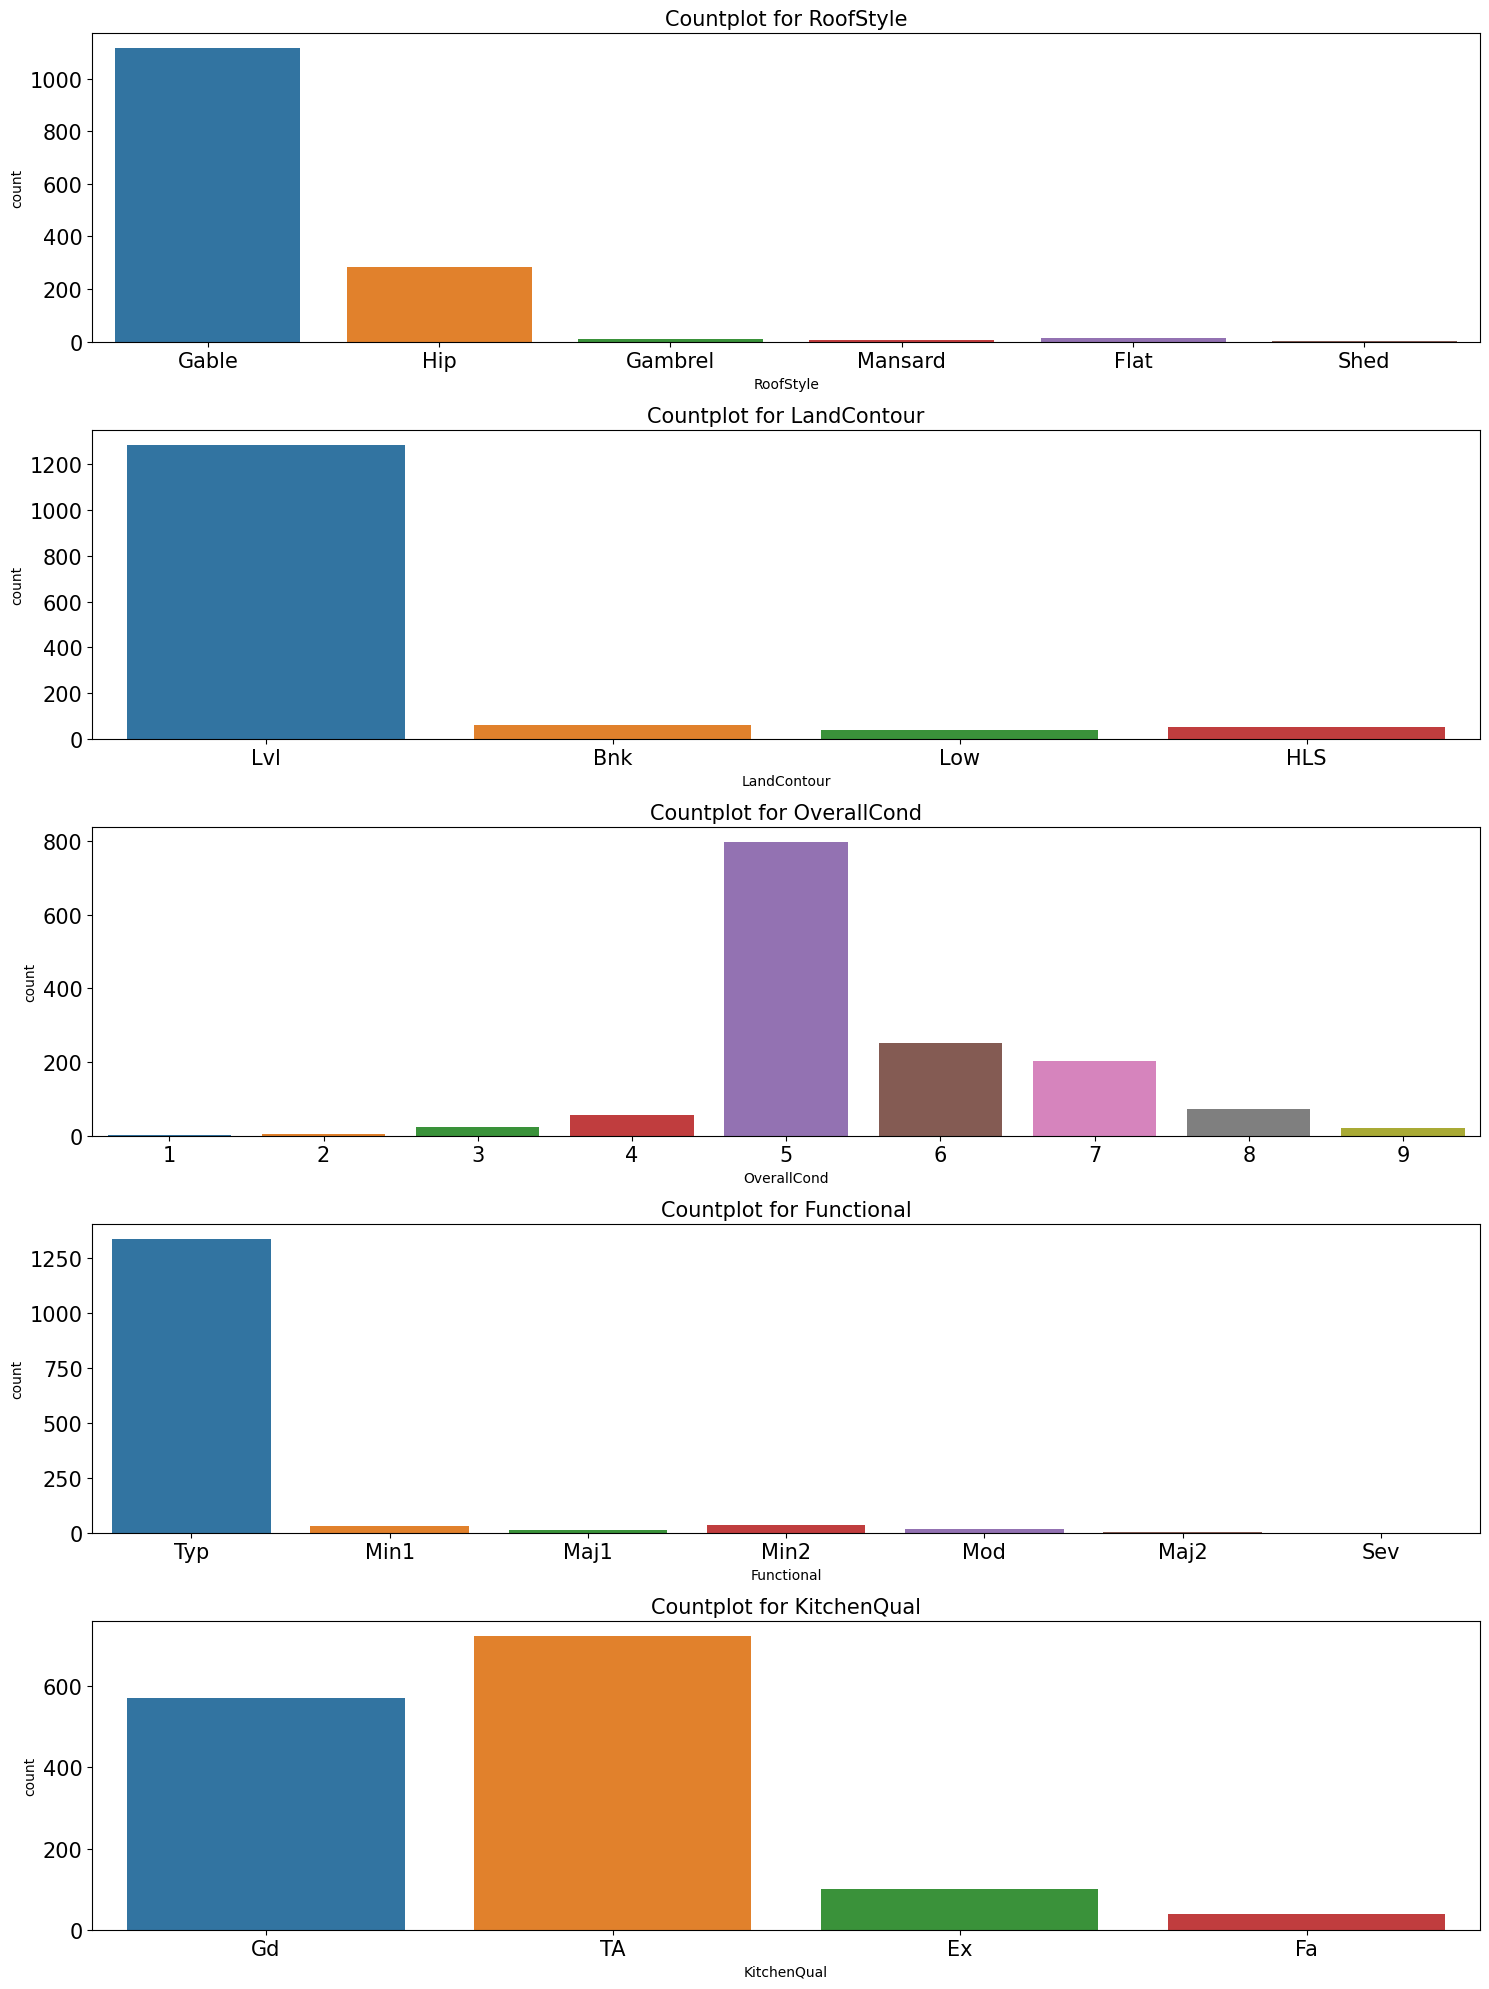

In [9]:
# your code here

# We first plot the distribution of each feature
f,axes = plt.subplots(5,1, figsize = (15,20))
axes = axes.flatten()
for i, col in enumerate(cat_feat):
  sns.countplot(data = new_df_train, x = col, ax = axes[i])
  axes[i].set_title(f"Countplot for {col}", fontsize = 15)
  axes[i].tick_params(axis = 'x', labelsize = 15)
  axes[i].tick_params(axis = 'y', labelsize = 15)


plt.tight_layout()
plt.show()


<Axes: xlabel='LotFrontage', ylabel='Density'>

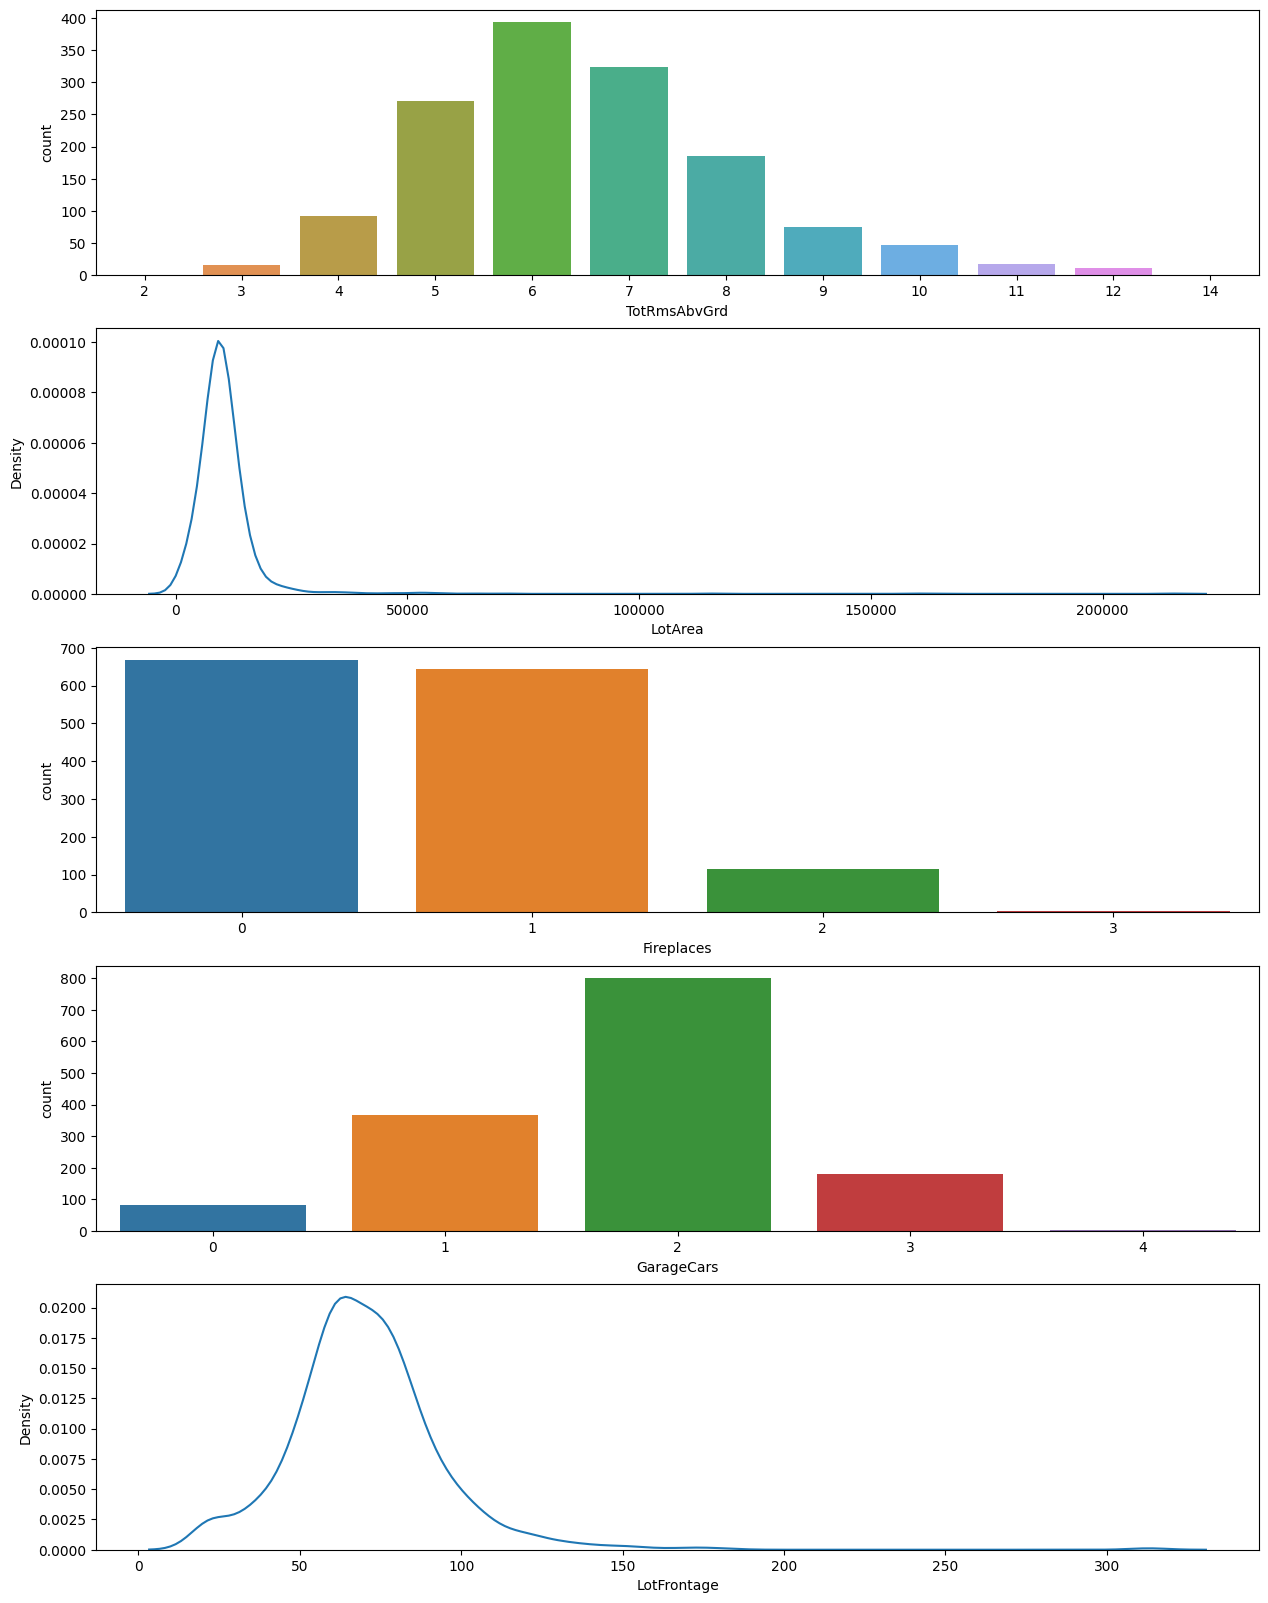

In [10]:
num_feat = ['TotRmsAbvGrd', 'LotArea', 'Fireplaces', 'GarageCars', 'LotFrontage']
f, axes = plt.subplots(5,1, figsize = (15,20))
axes = axes.flatten()
sns.countplot(data = new_df_train, x = 'TotRmsAbvGrd', ax = axes[0]) # good
sns.kdeplot(data = new_df_train, x = 'LotArea',ax = axes[1])
sns.countplot(data = new_df_train, x = 'Fireplaces', ax = axes[2]) #good
sns.countplot(data = new_df_train, x = 'GarageCars', ax = axes[3]) # good
sns.kdeplot(data = new_df_train, x = 'LotFrontage', ax = axes[4]) # bad

4 interesting plots :


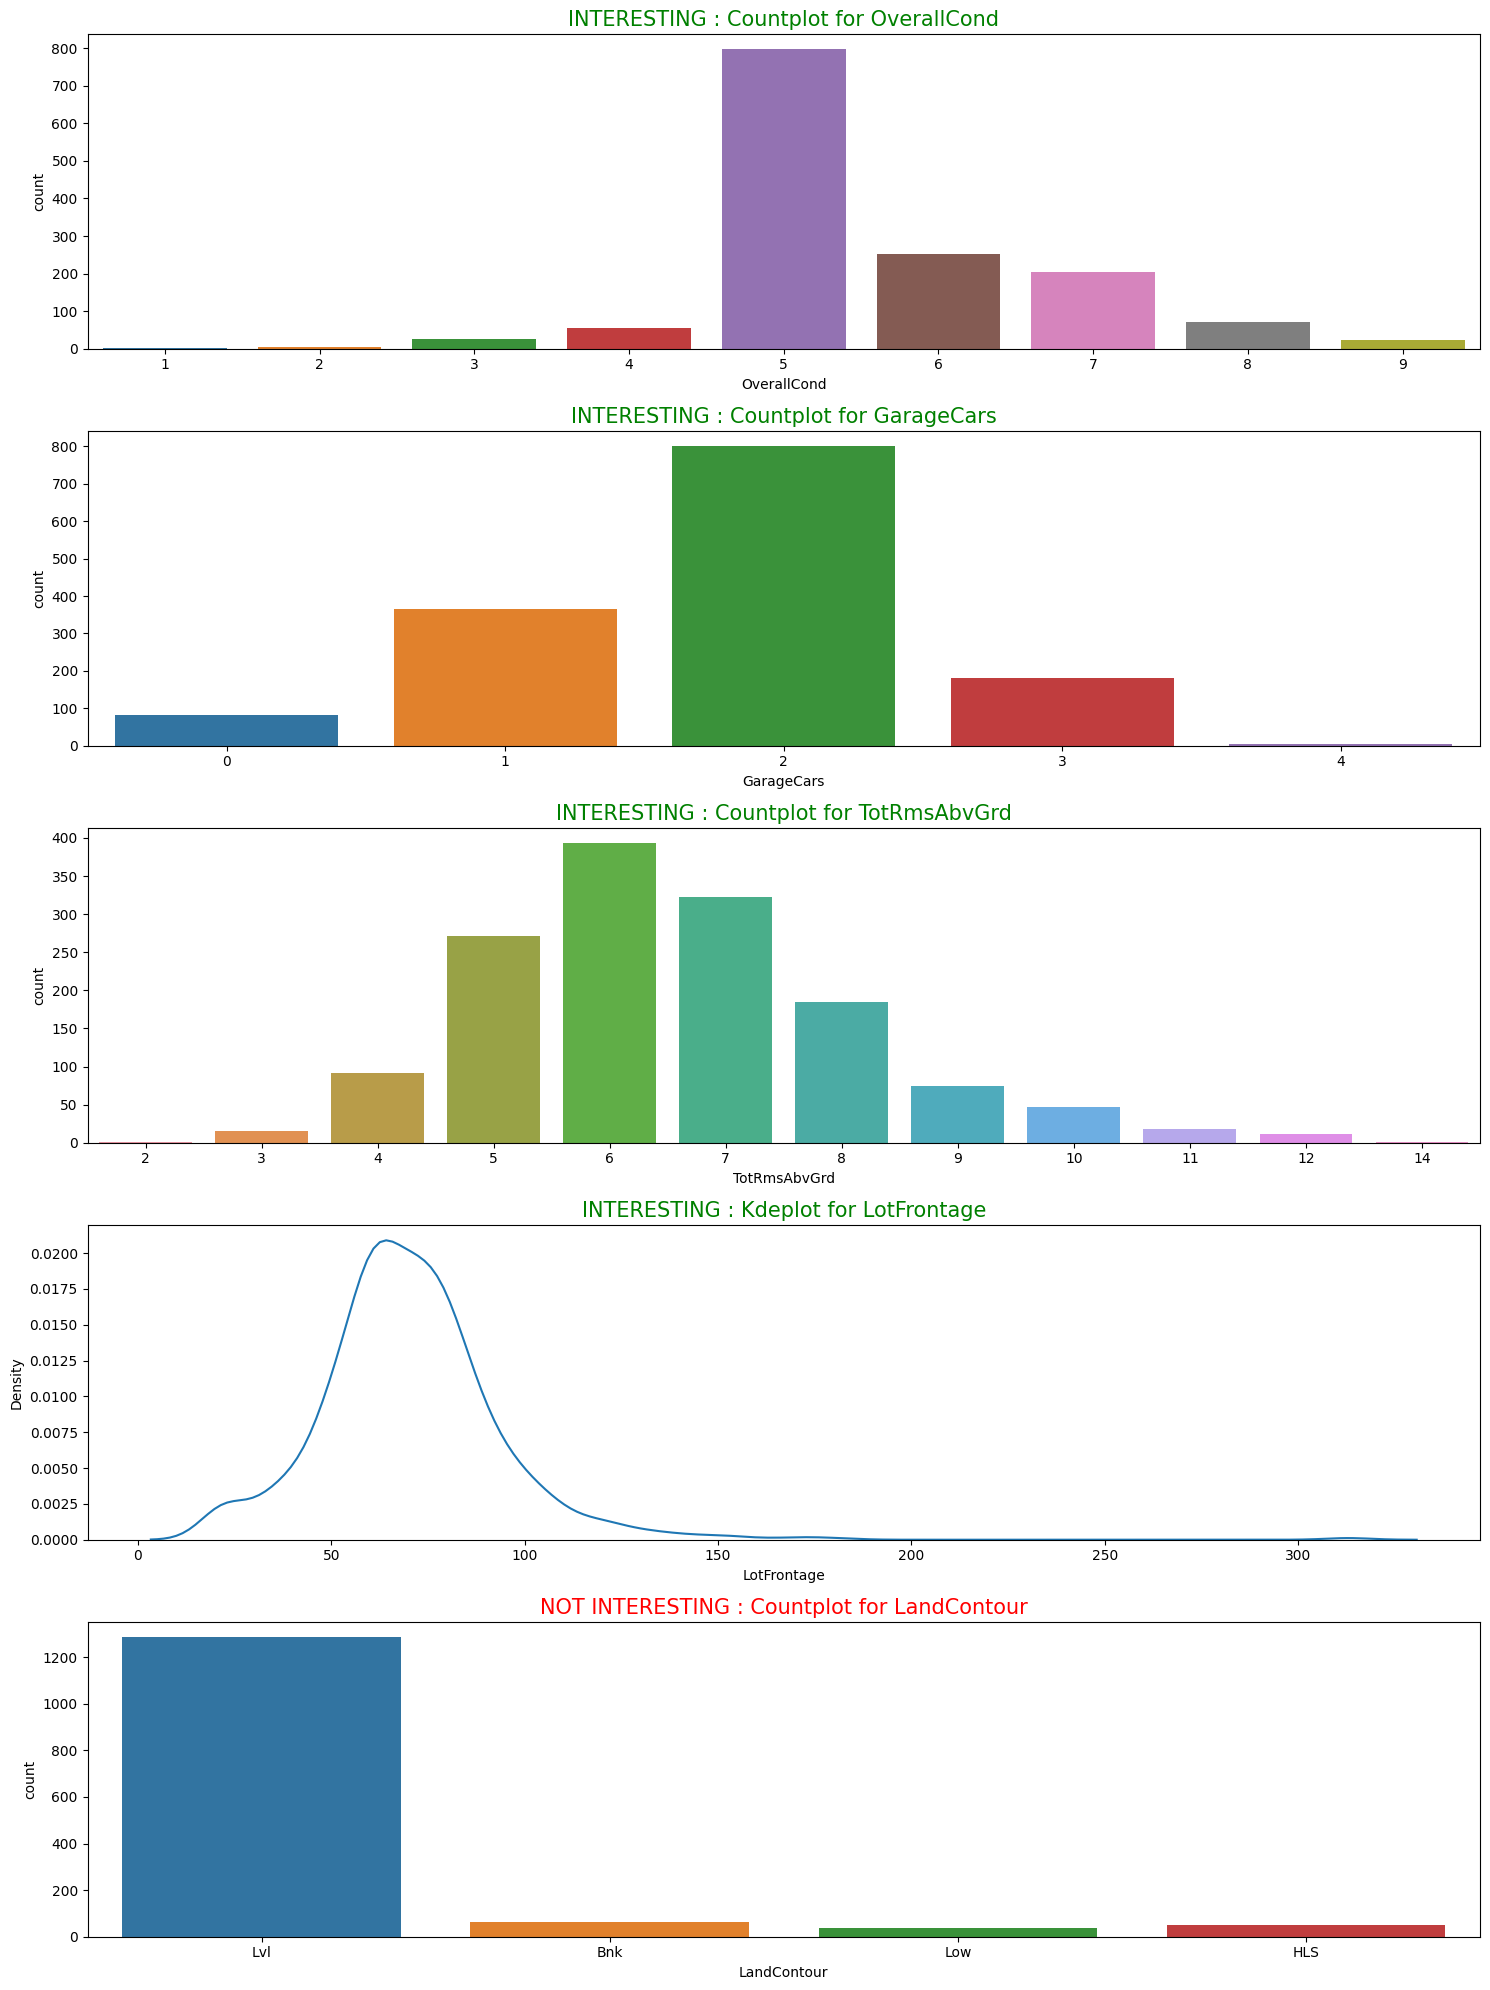

In [11]:
# 5 choosen plots

# 4 interesting plots :
print("4 interesting plots :")

f,axes = plt.subplots(5,1,figsize = (15,20))
#axes = axes.flatten()
sns.countplot(data = new_df_train, x = 'OverallCond', ax = axes[0])
axes[0].set_title("INTERESTING : Countplot for OverallCond", fontsize = 15, color = 'green')
sns.countplot(data = new_df_train, x = 'GarageCars', ax = axes[1])
axes[1].set_title("INTERESTING : Countplot for GarageCars", fontsize = 15,color = 'green')
sns.countplot(data = new_df_train, x = 'TotRmsAbvGrd', ax = axes[2])
axes[2].set_title("INTERESTING : Countplot for TotRmsAbvGrd", fontsize = 15,color = 'green')
sns.kdeplot(data = new_df_train, x = 'LotFrontage', ax = axes[3])
axes[3].set_title("INTERESTING : Kdeplot for LotFrontage", fontsize = 15,color = 'green')



sns.countplot(data = new_df_train, x = 'LandContour', ax = axes[4])
axes[4].set_title("NOT INTERESTING : Countplot for LandContour", fontsize = 15,color = 'red')

plt.tight_layout()
plt.show()





I have choosen those 4 plots because each values of the feature is scattered so the plot gives us a better idea of how values are spread.
The first 3 are countplots.
The 4th one is a kdeplot which is also interesting because it seems that 'LotFrontage' is close to be normally distributed and values are enough scattered.

The 5th one is not interesting because around 90% of the values are the same (='Lvl) so we do not have a lot of informations with this plot.

 11. Look at the distribution of the data in comparison to the dependent variable - **Choose 4 plots you think are important, and one that seems to give no added value. Explain why you chose these plots.**


In [12]:
new_df_train = pd.concat([new_df_train,df_train['SalePrice']], axis = 1)

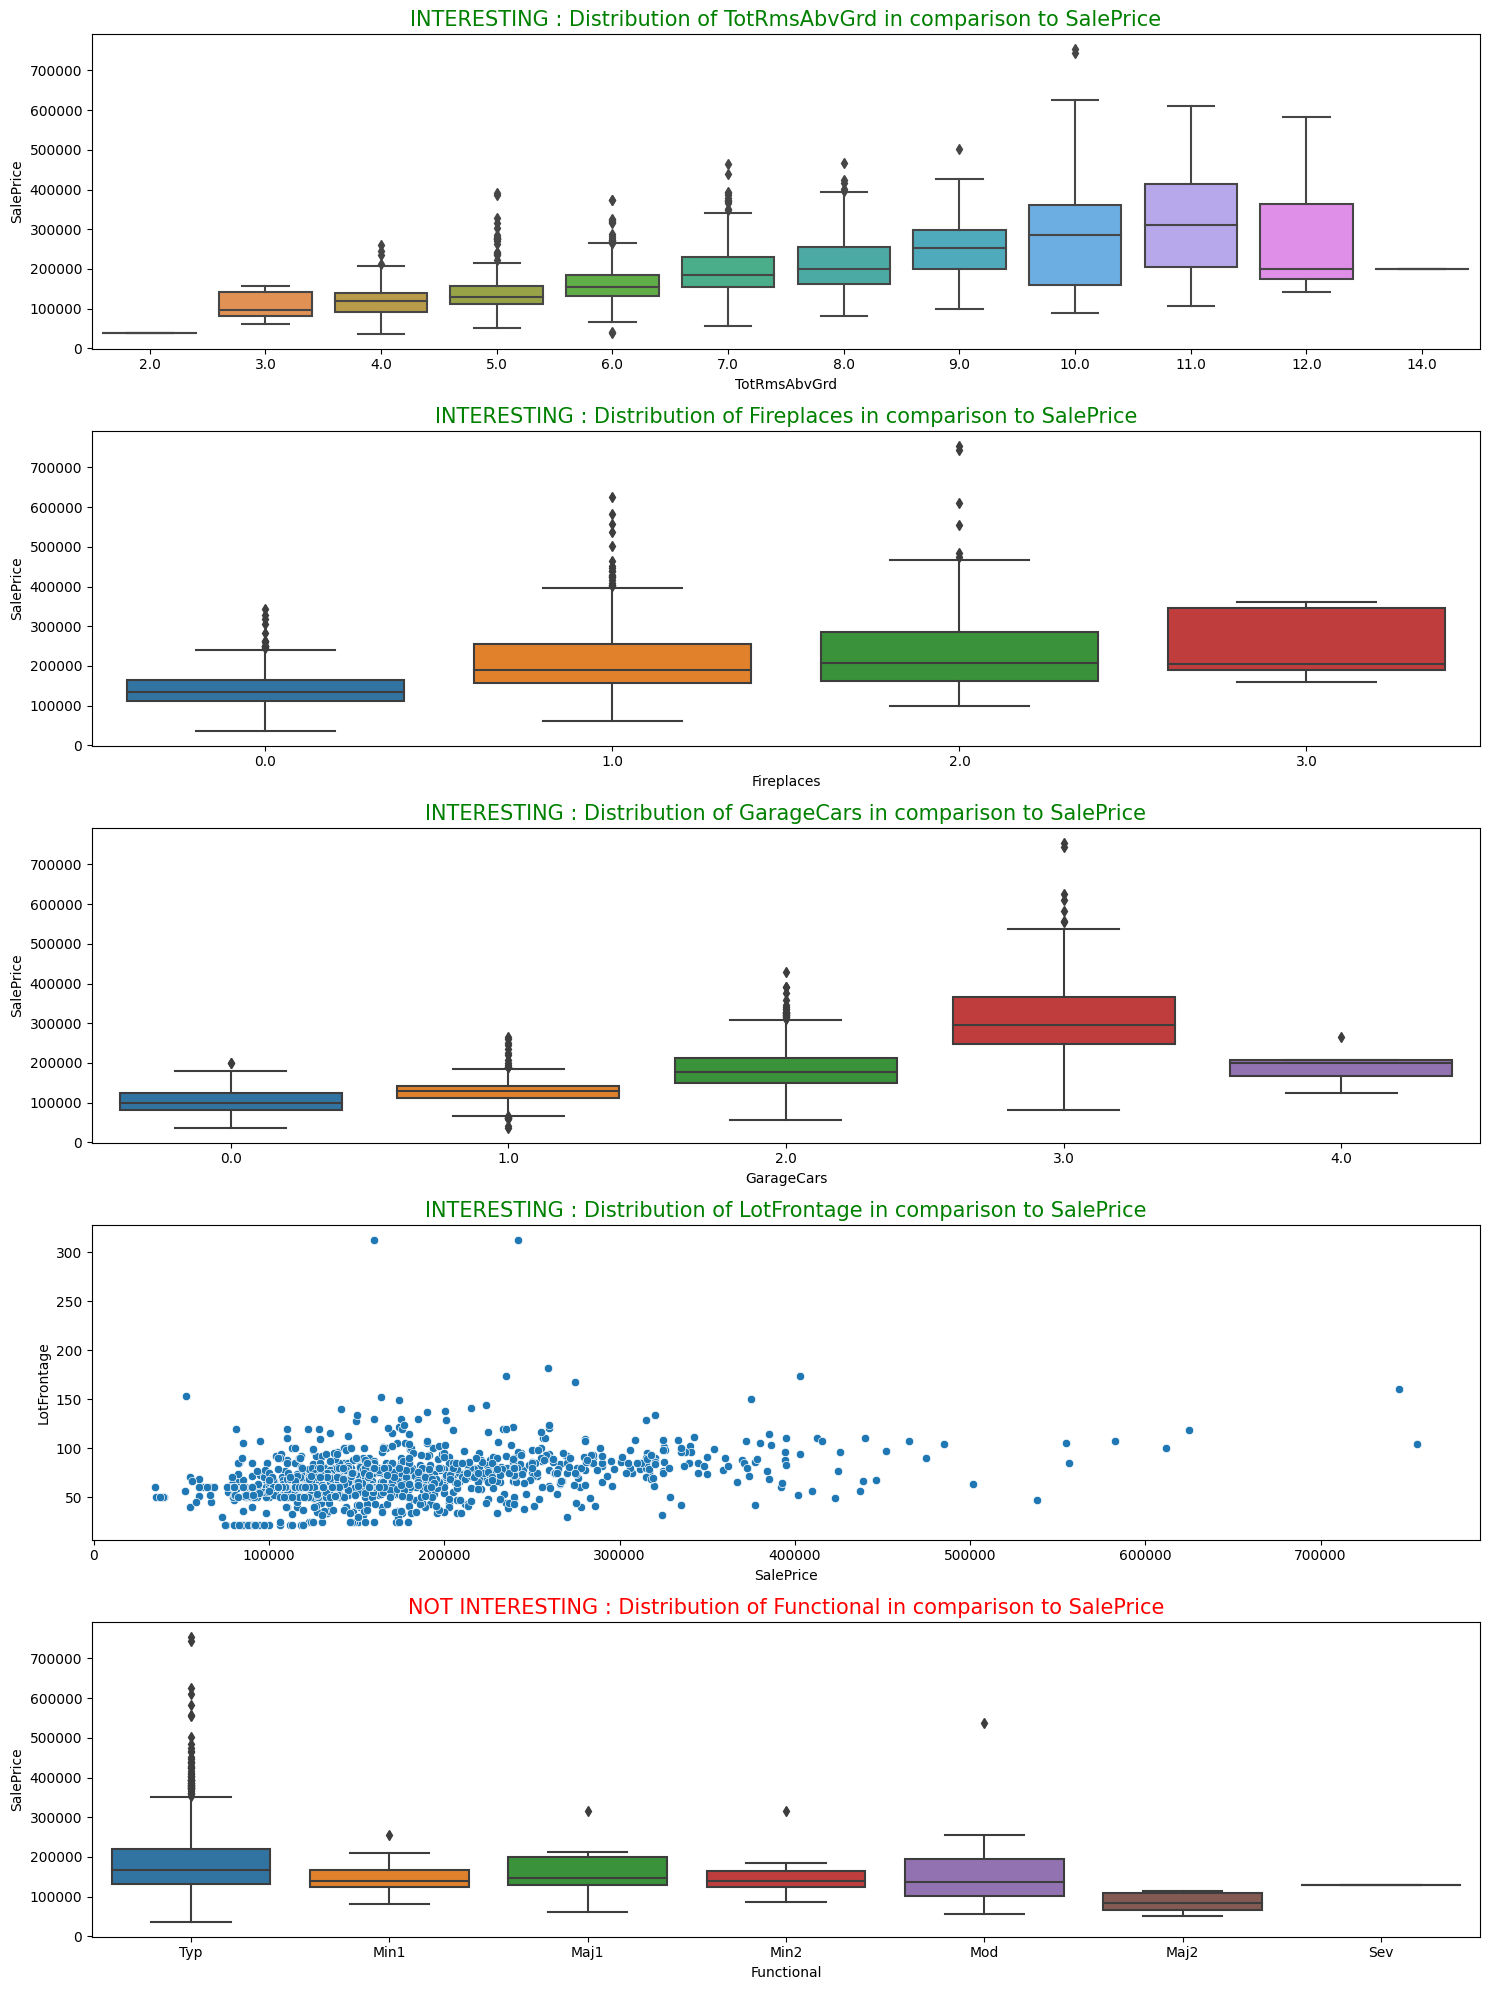

In [13]:
# your code here
f,axes = plt.subplots(5,1, figsize = (15,20))

sns.boxplot(data = new_df_train, y = 'SalePrice', x = 'TotRmsAbvGrd', ax = axes[0])
axes[0].set_title("INTERESTING : Distribution of TotRmsAbvGrd in comparison to SalePrice", fontsize = 15,color = 'green')

sns.boxplot(data = new_df_train, y = 'SalePrice', x = 'Fireplaces', ax = axes[1])
axes[1].set_title("INTERESTING : Distribution of Fireplaces in comparison to SalePrice", fontsize = 15,color = 'green')

sns.boxplot(data = new_df_train, y = 'SalePrice', x = 'GarageCars', ax = axes[2])
axes[2].set_title("INTERESTING : Distribution of GarageCars in comparison to SalePrice", fontsize = 15,color = 'green')

sns.scatterplot(data = new_df_train, y = 'LotFrontage', x = 'SalePrice', ax = axes[3])
axes[3].set_title("INTERESTING : Distribution of LotFrontage in comparison to SalePrice", fontsize = 15,color = 'green')

sns.boxplot(data = new_df_train, y = 'SalePrice', x = 'Functional', ax = axes[4])
axes[4].set_title("NOT INTERESTING : Distribution of Functional in comparison to SalePrice", fontsize = 15,color = 'red')



plt.tight_layout()
plt.show()

I chose those plots because for each of them, the values of the distribution in comparison to the dependant variable are quite spreaded so we can get interesting informations. For the last one, each values of the feature look equally spreaded with the others so we can not get interesting informations.

 12. Look at the distribution of features against each other (inter-correlations) - **Choose 4 plots you think are important, and one that seems to give no added value. Explain why you chose these plots.**

<ipython-input-14-41f8ec51ee44>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_spearman = new_df_train[subset].corr(method = 'spearman')


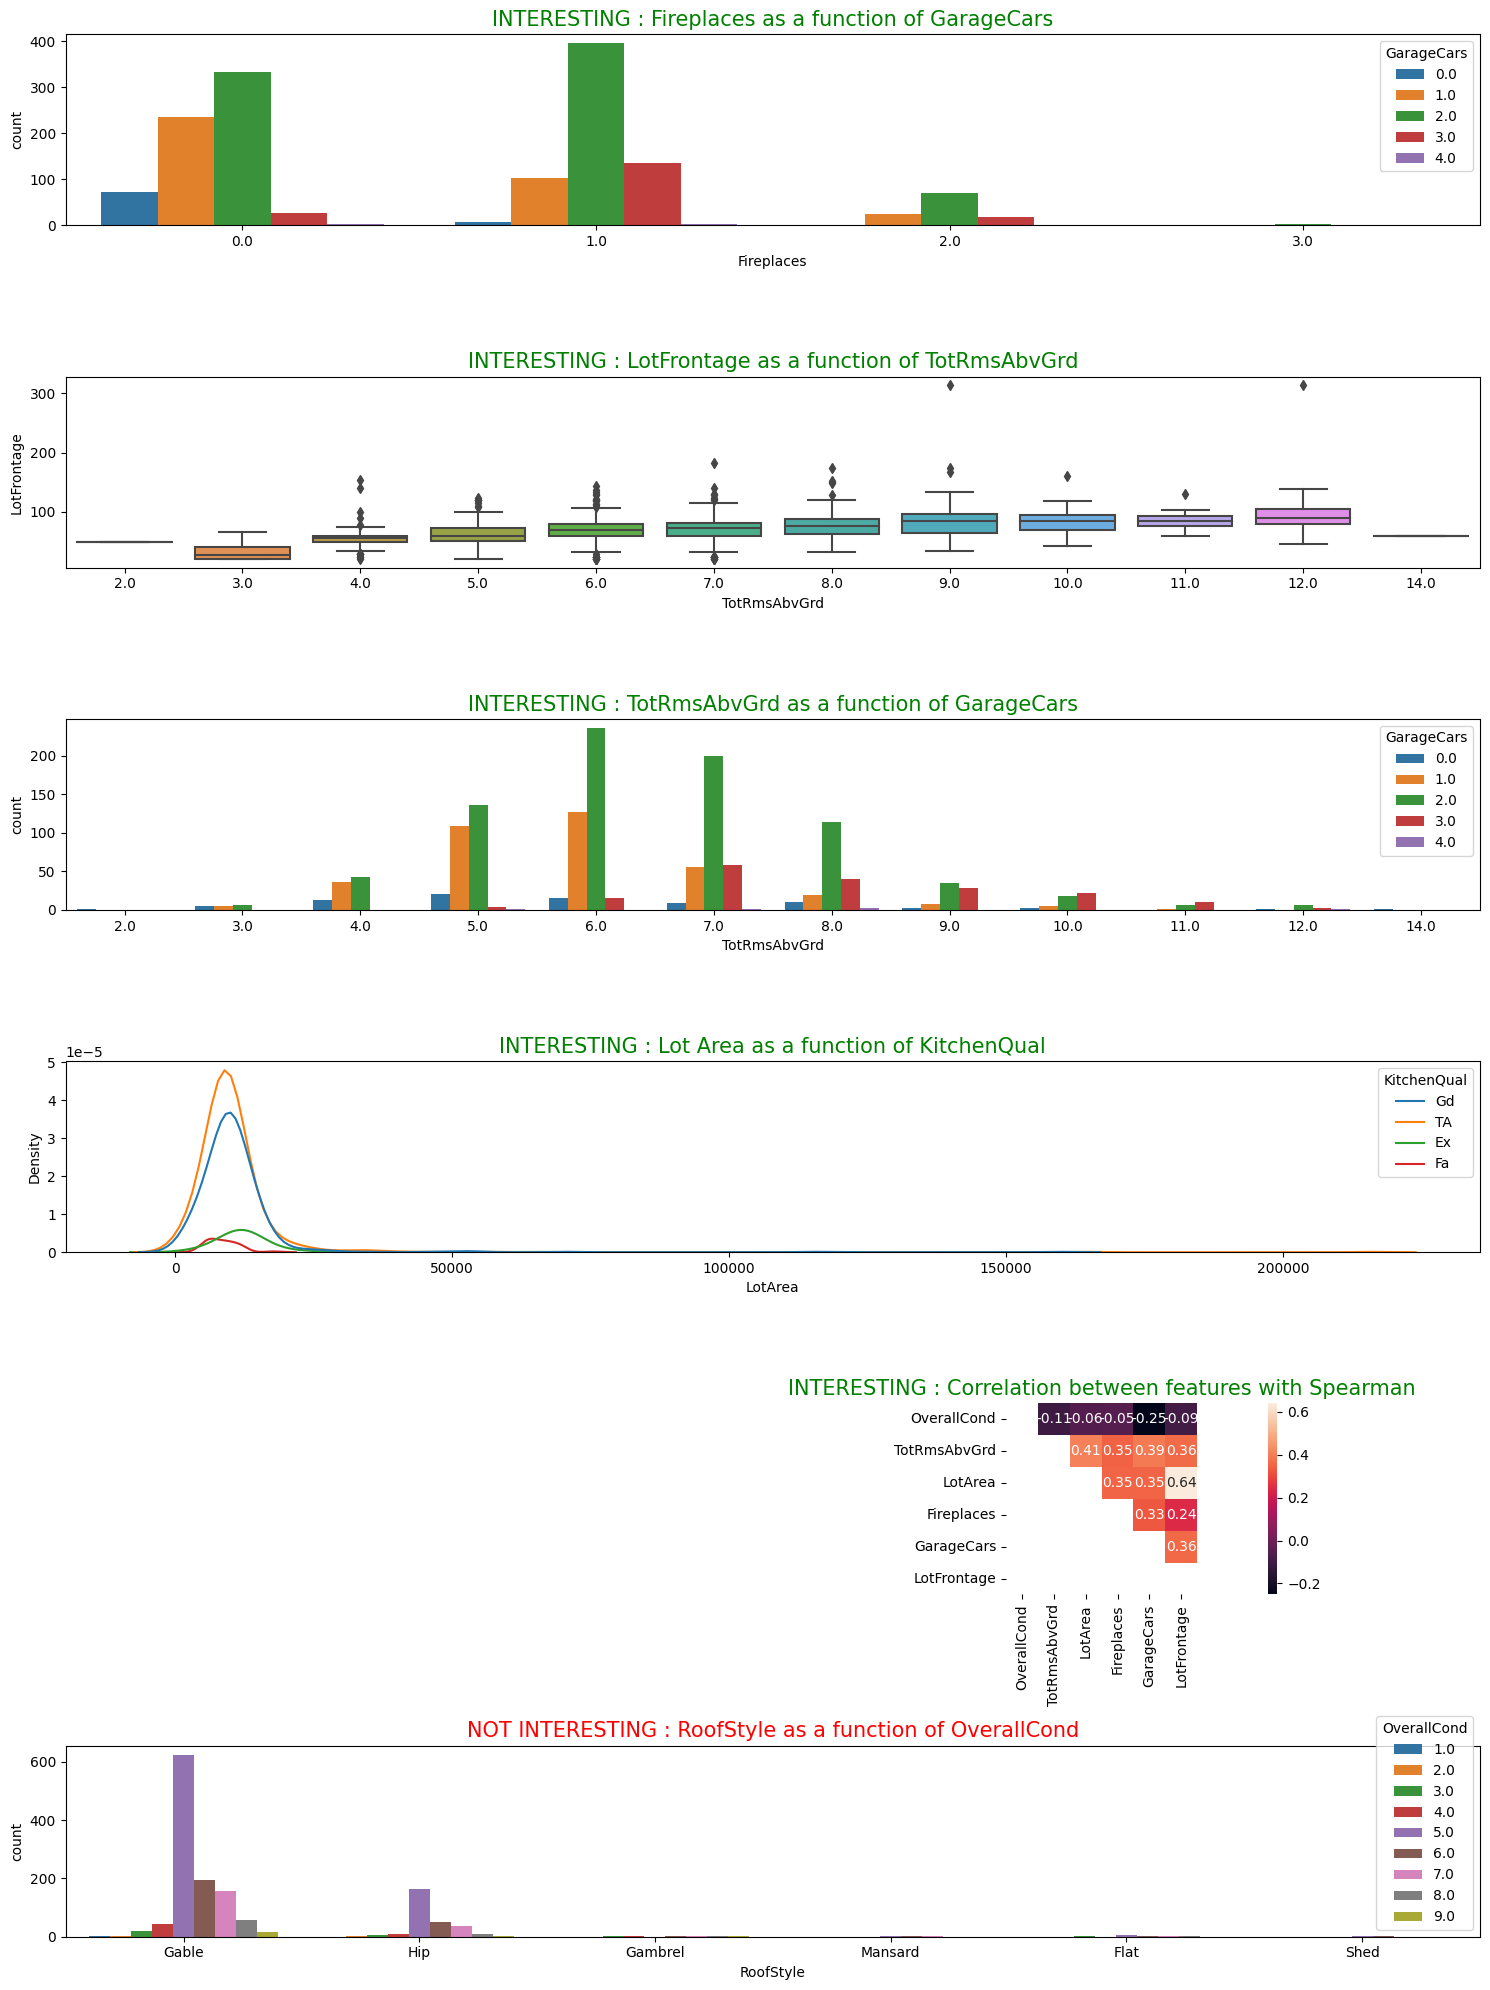

In [14]:
f,axes = plt.subplots(6,1,figsize = (15,20))
sns.countplot(data = new_df_train, x = 'Fireplaces', hue = 'GarageCars', ax = axes[0])
axes[0].set_title('INTERESTING : Fireplaces as a function of GarageCars',fontsize = 15, color = 'green')

sns.boxplot(data = new_df_train, x = 'TotRmsAbvGrd', y = 'LotFrontage', ax = axes[1])
axes[1].set_title('INTERESTING : LotFrontage as a function of TotRmsAbvGrd',fontsize = 15, color = 'green')


sns.countplot(data = new_df_train, x = 'TotRmsAbvGrd', hue = 'GarageCars', ax = axes[2])
axes[2].set_title('INTERESTING : TotRmsAbvGrd as a function of GarageCars',fontsize = 15, color = 'green')

sns.kdeplot(data = new_df_train, x = 'LotArea', hue = 'KitchenQual', ax = axes[3])
axes[3].set_title('INTERESTING : Lot Area as a function of KitchenQual',fontsize = 15, color = 'green')


df_corr_spearman = new_df_train[subset].corr(method = 'spearman')
mask = np.tril(np.ones_like(df_corr_spearman, dtype=bool))
sns.heatmap(df_corr_spearman, annot = True, fmt = '.2f', mask = mask,square = True, ax = axes[4])
axes[4].set_title('INTERESTING : Correlation between features with Spearman', fontsize = 15, color = 'green')


sns.countplot(data = new_df_train, x = 'RoofStyle', hue = 'OverallCond', ax = axes[5])
axes[5].set_title('NOT INTERESTING : RoofStyle as a function of OverallCond', fontsize = 15, color = 'red')

plt.tight_layout()
plt.show()




I chose these plots because feature that are plotted together are linked so informations we get on those plots make sense.

The last one is not interesting because 4 values of the feature on the x-axis have very small values so we do not get significant results.